<a href="https://colab.research.google.com/github/joaohnt/estudo_ml/blob/main/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [3]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# pos

In [43]:
pln = spacy.load('pt_core_news_sm')
pln

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [44]:
doc = pln('João está estudando machine learning! 😎')

In [45]:
type(doc)

spacy.tokens.doc.Doc

In [46]:
for token in doc:
  print(token.text, token.pos_)

João PROPN
está AUX
estudando VERB
machine NOUN
learning PROPN
! PUNCT
😎 VERB


In [47]:
for token in doc:
  print(token.text, token.lemma_)

João João
está estar
estudando estudar
machine machine
learning learning
! !
😎 😎


In [48]:
doc1 = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['João', 'estar', 'estudar', 'machine', 'learning', '!', '😎']

In [49]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [50]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [51]:
for token in doc:
  print(token.text, token.lemma_, stemmer.stem(token.text))

João João joã
está estar est
estudando estudar estud
machine machine machin
learning learning learning
! ! !
😎 😎 😎


# carregamento dos textos + busca

In [102]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Nier:_Automata')

In [103]:
dados = dados.read()

In [104]:
dados_html = bs.BeautifulSoup(dados, 'lxml')

In [105]:
paragrafos = dados_html.find_all('p')

In [106]:
len(paragrafos)

31

In [107]:
paragrafos[1]

<p>O desenvolvimento começou em 2014, com o diretor <a href="/wiki/Yoko_Taro" title="Yoko Taro">Yoko Taro</a>, o produtor Yosuke Saito e os compositores Keiichi Okabe e Keigo Hoashi retornando nas mesmas funções que tinham desempenhado no <i>Nier</i> original. A história foi baseada ao redor de temas similares aos trabalhos anteriores de Yoko, como o impulso para matar, ao mesmo tempo incorporando questões como o confronto do preconceito e a fuga de situações difíceis. O objetivo era fazer um jogo fiel ao espírito do original, mas que simultaneamente possuísse uma jogabilidade de combate melhor. A equipe da PlatinumGames enfrentou vários desafios no desenvolvimento das diversas mecânicas de jogo e do <a href="/wiki/Mundo_aberto" title="Mundo aberto">mundo aberto</a> já que o estilo projeto era inteiramente novo para eles.
</p>

In [108]:
paragrafos[1].text

'O desenvolvimento começou em 2014, com o diretor Yoko Taro, o produtor Yosuke Saito e os compositores Keiichi Okabe e Keigo Hoashi retornando nas mesmas funções que tinham desempenhado no Nier original. A história foi baseada ao redor de temas similares aos trabalhos anteriores de Yoko, como o impulso para matar, ao mesmo tempo incorporando questões como o confronto do preconceito e a fuga de situações difíceis. O objetivo era fazer um jogo fiel ao espírito do original, mas que simultaneamente possuísse uma jogabilidade de combate melhor. A equipe da PlatinumGames enfrentou vários desafios no desenvolvimento das diversas mecânicas de jogo e do mundo aberto já que o estilo projeto era inteiramente novo para eles.\n'

In [109]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [110]:
conteudo

'Nier: Automata (ニーア オートマタ, Nīa Ōtomata) é um jogo eletrônico de RPG de ação desenvolvido pela PlatinumGames e publicado pela Square Enix. Foi lançado em fevereiro de 2017 no Japão e mundialmente no mês seguinte para PlayStation 4 e Microsoft Windows, com uma versão para Xbox One estreando em junho de 2018. O jogo é uma sequência de Nier, um spin-off da série Drakengard. A história se passa milhares de anos no futuro em meio a uma guerra por procuração entre máquinas criadas por invasores alienígenas e andróides concebidos pelos remanescentes da humanidade, acompanhando os androides 2B, 9S e A2. A jogabilidade combina elementos de RPG com um combate voltado para a ação e uma mistura de outros gêneros.\nO desenvolvimento começou em 2014, com o diretor Yoko Taro, o produtor Yosuke Saito e os compositores Keiichi Okabe e Keigo Hoashi retornando nas mesmas funções que tinham desempenhado no Nier original. A história foi baseada ao redor de temas similares aos trabalhos anteriores de Yoko, 

In [111]:
conteudo = conteudo.lower() # eh legal fazer isso pq as vzs uma letra maiuscula pode significar outra coisa pelo algoritmo
conteudo

'nier: automata (ニーア オートマタ, nīa ōtomata) é um jogo eletrônico de rpg de ação desenvolvido pela platinumgames e publicado pela square enix. foi lançado em fevereiro de 2017 no japão e mundialmente no mês seguinte para playstation 4 e microsoft windows, com uma versão para xbox one estreando em junho de 2018. o jogo é uma sequência de nier, um spin-off da série drakengard. a história se passa milhares de anos no futuro em meio a uma guerra por procuração entre máquinas criadas por invasores alienígenas e andróides concebidos pelos remanescentes da humanidade, acompanhando os androides 2b, 9s e a2. a jogabilidade combina elementos de rpg com um combate voltado para a ação e uma mistura de outros gêneros.\no desenvolvimento começou em 2014, com o diretor yoko taro, o produtor yosuke saito e os compositores keiichi okabe e keigo hoashi retornando nas mesmas funções que tinham desempenhado no nier original. a história foi baseada ao redor de temas similares aos trabalhos anteriores de yoko, 

In [112]:
pln = spacy.load('pt_core_news_sm')
pln

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [113]:
string = 'yorha'
token_pesquisa = pln(string)

In [114]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [115]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 994, 995),
 (8661325627334373315, 1032, 1033),
 (8661325627334373315, 1067, 1068),
 (8661325627334373315, 1084, 1085),
 (8661325627334373315, 1100, 1101),
 (8661325627334373315, 1119, 1120),
 (8661325627334373315, 1127, 1128),
 (8661325627334373315, 1225, 1226),
 (8661325627334373315, 1236, 1237),
 (8661325627334373315, 1247, 1248),
 (8661325627334373315, 1532, 1533),
 (8661325627334373315, 1590, 1591),
 (8661325627334373315, 1657, 1658),
 (8661325627334373315, 1702, 1703),
 (8661325627334373315, 1919, 1920),
 (8661325627334373315, 2020, 2021),
 (8661325627334373315, 2084, 2085),
 (8661325627334373315, 2101, 2102)]

In [116]:
doc[46-10:47+10] # o +-10 eh pra saber o contexto em qual essa busca foi feita

mundialmente no mês seguinte para playstation 4 e microsoft windows, com uma versão para xbox one estreando em junho de

In [117]:
doc[472-10:473+10]

para uma vista aérea ou lateral durante a navegação por certos ambientes.[4] algumas das áreas incluem quebra-cabeças de plataforma que

In [118]:
matches[0]

(8661325627334373315, 994, 995)

In [125]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados: </strong>{len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0: # qr dizer q encontrou no começo do paragrafo e n tem texto p esq
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

# extracao de entidades nomeadas

In [126]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

nier PER
automata LOC
square enix MISC
japão LOC
playstation MISC
microsoft windows MISC
one MISC
nier PER
drakengard MISC
a2 LOC
yoko taro PER
yosuke saito PER
keiichi okabe PER
keigo hoashi PER
nier ORG
yoko PER
square ORG
electronic MISC
nier PER
automata LOC
nier original.[1 MISC
nier PER
compostura.[9][10][11 MISC
a2 LOC
adão PER
eva PER
nier PER
yorha ORG
nier PER
nier PER
mencionados.[12 LOC
anemone PER
adão PER
eva PER
a2 LOC
grupos,[14][15 LOC
adão PER
eva ORG
adão PER
nier PER
yorha ORG
adão PER
eva PER
yorha ORG
a2 LOC
a2 LOC
a2 LOC
yorha ORG
instável.[26][27 PER
a2 LOC
a2 LOC
adão PER
eva PER
a2 LOC
nier PER
yoko taro PER
yosuke saito PER
saito PER
yuki yokoyama PER
yoko PER
yoko PER
tóquio LOC
osaka LOC
nier PER
square ORG
produtora.[31 ORG
playstation MISC
yoko PER
playstation MISC
yoko PER
nier PER
nier retornaram.[1][30][34 PER
nier PER
osaka LOC
tóquio LOC
nier PER
the witcher 3 MISC
nier PER
história.[8][31 ORG
yoko PER
yoko PER
jogo.[35 LOC
yoko PER
nier PER
yoko PER

In [127]:
from spacy import displacy
displacy.render(doc,style = 'ent', jupyter = True)

# nuvem de palavras

In [128]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [129]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words= 100, colormap = color_map)

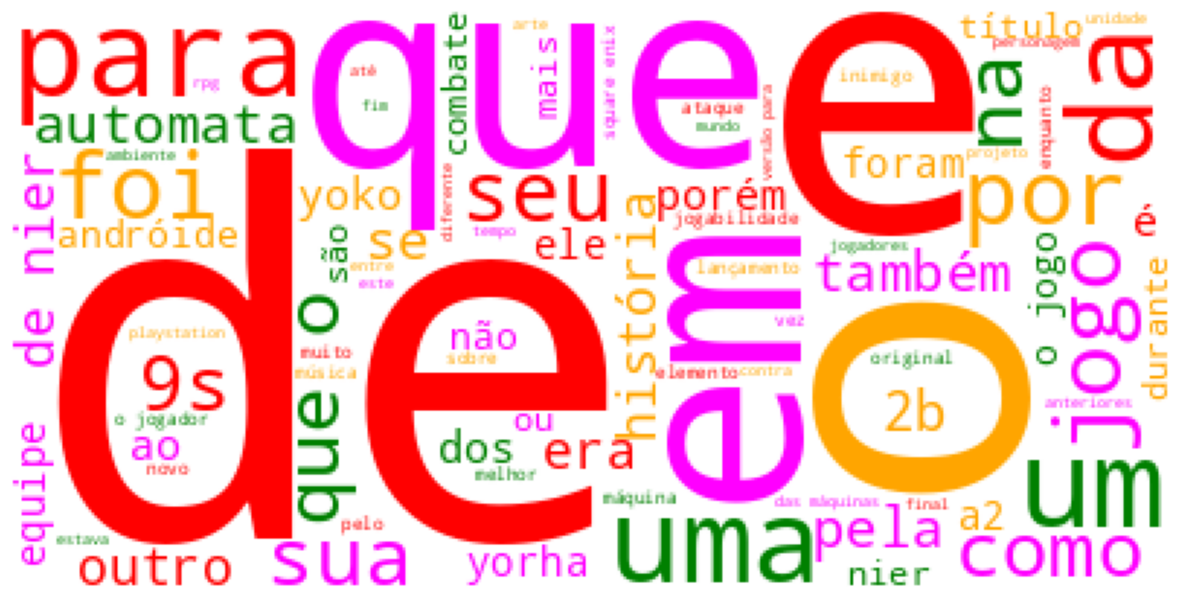

In [131]:
import matplotlib.pyplot as plt
cloud = cloud.generate(conteudo)
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [132]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'faço', 'lhe', 'minhas', 'falta', 'dois', 'favor', 'cá', 'fazia', 'fazemos', 'geral', 'fazes', 'estará', 'quinze', 'agora', 'naquele', 'aquele', 'aqueles', 'quais', 'treze', 'embora', 'final', 'oito', 'após', 'estes', 'tivemos', 'caminho', 'como', 'pouco', 'mil', 'toda', 'direita', 'devem', 'tão', 'povo', 'pôde', 'questão', 'dentro', 'segundo', 'estás', 'números', 'sob', 'tempo', 'pois', 'quando', 'menos', 'porque', 'segunda', 'quieta', 'vossas', 'foi', 'nova', 'último', 'demais', 'nesta', 'nós', 'ponto', 'assim', 'desse', 'conselho', 'ao', 'dessa', 'nuns', 'foste', 'à', 'tudo', 'quinto', 'da', 'terceiro', 'essa', 'dez', 'nível', 'nos', 'sou', 'põe', 'maior', 'cima', 'fora', 'primeiro', 'ainda', 'muitos', 'estive', 'vez', 'isso', 'vós', 'apenas', 'às', 'é', 'deste', 'primeira', 'temos', 'enquanto', 'vinte', 'tuas', 'que', 'des', 'umas', 'terceira', 'esse', 'vossa', 'outra', 'grandes', 'inicio', 'tendes', 'dão', 'fazeis', 'está', 'corrente', 'ligado', 'até', 'quem', 'podem', 'esta', 'p

In [133]:
len(STOP_WORDS)

416

In [138]:
pln.vocab['assim'].is_stop

True

In [139]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [140]:
print(lista_token)

['nier', ':', 'automata', '(', 'ニーア', 'オートマタ', ',', 'nīa', 'ōtomata', ')', 'é', 'um', 'jogo', 'eletrônico', 'de', 'rpg', 'de', 'ação', 'desenvolvido', 'pela', 'platinumgames', 'e', 'publicado', 'pela', 'square', 'enix', '.', 'foi', 'lançado', 'em', 'fevereiro', 'de', '2017', 'no', 'japão', 'e', 'mundialmente', 'no', 'mês', 'seguinte', 'para', 'playstation', '4', 'e', 'microsoft', 'windows', ',', 'com', 'uma', 'versão', 'para', 'xbox', 'one', 'estreando', 'em', 'junho', 'de', '2018', '.', 'o', 'jogo', 'é', 'uma', 'sequência', 'de', 'nier', ',', 'um', 'spin-off', 'da', 'série', 'drakengard', '.', 'a', 'história', 'se', 'passa', 'milhares', 'de', 'anos', 'no', 'futuro', 'em', 'meio', 'a', 'uma', 'guerra', 'por', 'procuração', 'entre', 'máquinas', 'criadas', 'por', 'invasores', 'alienígenas', 'e', 'andróides', 'concebidos', 'pelos', 'remanescentes', 'da', 'humanidade', ',', 'acompanhando', 'os', 'androides', '2b', ',', '9s', 'e', 'a2', '.', 'a', 'jogabilidade', 'combina', 'elementos', 'de'

In [141]:
len(lista_token)

5997

In [142]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [143]:
len(sem_stop)

3439

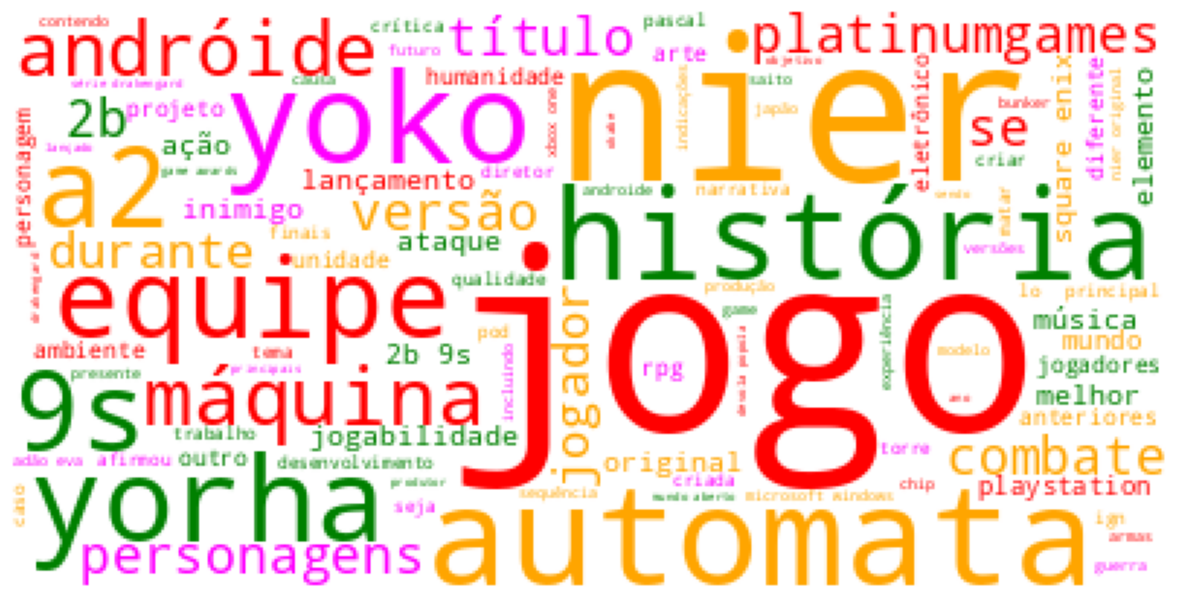

In [145]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()